## Classification
Classification problems refer to the challenge of, having some input data, predicting a class for the target variable. Given that you're ugly and old, the model will predict that you snore. This kind of problems is dealt with classification algorithms.

Classification problems are divided into:
- binary classification: the model has to choose between two classes
- multiclass classification: the model has to choose between more than two classes

A lot of different methods exist for classification purposes. But a very important part is how to adress and fine-tune them. Infact in classification settings, finding a clear way of computing the prediction error is not as easy as in the regression case. For this reason a lot of methods can be used for studying the performance of a classification method:
- Graphical Tools: ROC curve, prediction-recall curve
- Non-graphical tools: confusion matrix, cross-validation   

In this chapter we will work with the MNIST dataset.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

First of all let's familiarize with the dataset. It is a dateset made out of 70000 images of 28x28 pixels, raffiguring han drawn numbers. 

In [2]:
print(mnist["DESCR"])

X, y = mnist["data"], mnist["target"]
# data: X
# labels: y


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

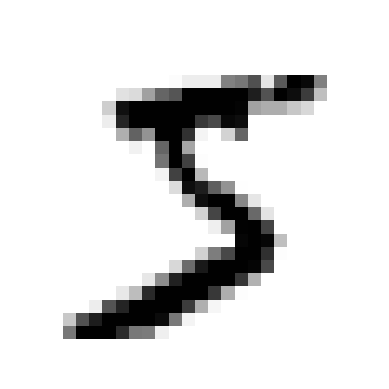

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()


In [27]:
y[0] # label if the first entry in the dataset

# since most ML learning algorithms work with strings let's cast y to int type
y = y.astype(np.uint8)

For working with it, we have to create a training set and a test set:

In [30]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Let's train as out first model, a simple binary classifier. Its task will be to identify 5-s. So the output will be True if the model thinks it is a 5, False otherwise. 

In [ ]:
y_train_5 = (y_train == 5) # a list of boolean values. This can be used as labels list for the binary classification problem
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_cl = SGDClassifier(random_state=42)
sgd_cl.fit(X_train, y_train_5)

# about 20 seconds are needed for model training

SGDClassifier(random_state=42)

In [32]:
sgd_cl.predict([some_digit])

c:\Users\bianc\Documents\VSC_code\HandsOnMachineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

#### Cross-Validation
Let's try cross validation on our model to look at its performance. This is an easy way of checking the goodness of our model, that works both in the regression and classification case.

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_cl, X_train, y_train_5, cv = 3, scoring = "accuracy")

# around 50 seconds are needed for running the code

array([0.95035, 0.96035, 0.9604 ])

#### Confusion Matrix
The confusion matrix is a matrix C whose elements are of the form: 
$$a_{i,j} = \text{n. of times an instance of class i was predicted to be of class j}$$

In [38]:
from sklearn.model_selection import cross_val_predict # putputs the predictions insted of the MSE evaluation for every fold considered
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_cl, X_train, y_train_5, cv = 3) # predicts on all the training set
confusion_mt = confusion_matrix(y_train_5, y_train_pred) # creating the confusione matrix

The confusion matrix really encodes a lot of information. For construction, on the diagonal we see the number of times the model predicted i and i war the true response. If there are non-null numbers out of the diagonal, that's where the model got something wrong.

A good idea is to visualize the confusion matrix, with something like a heat-map.

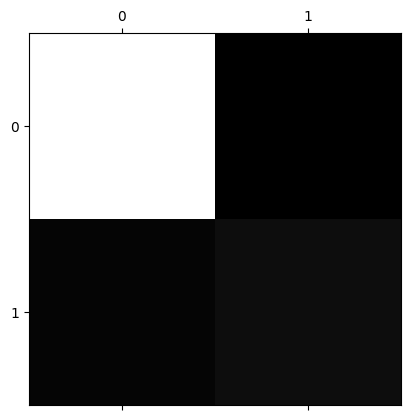

In [40]:
from matplotlib.pyplot import matshow

plt.matshow(confusion_mt, cmap = plt.cm.gray)
plt.show()

In an utopic world where every model has perfect accuracy, only the diagonal would be colourful. But in our world, we have to take a look at the coloured non-diagonal positions, that's where the model error lies. We can also take a look at how this one becomes when we perform multiclass regression.

#### Precision and Recall
Precision and recall are two very important indices used for assessing model performance in classification settings. The precision (p) is computed as the model rate of success on *true* guesses. The recall is anothe measure and is the rate of times the *true* value was guessed correctly by the model. 
$$\text{precision} = \frac{\text{TP}}{\text{TP + FP}}$$
$$\text{recall} = \frac{\text{TP}}{\text{TP + FN}}$$
The precision is a measure that looks at the predictions, while the recall is a measure that looks at true values. They also have a trade-off situation between them. Infact every classification algorithm works by assigning, via a classification function, a score to an input value. Then the prediciton is made based upon if the score passed an imposed threshold or not. 

The Precision-Recall trade-off can be understood by making this threshold value vary. If we set a very high threshold, then when the model predicts *True*, then it will be almost always correct, so its precision would be almost 1. This means that every time it says *True*, then it is right. But in this case the model recall would be very low. Infact with a very high threshold the number of times it would have has said *True* is very high wrt the actual number of times it predicted *True*. On the other hand, if we set the threshold to be very low, then the precision crumbles and the recall skyrockets. Ideally we have to find a threshold such that the model we get satisfies in an optimal manner this precision-recall trade-off

In [43]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

Let's give a look at how to set manually the threshold for a classification poblem. The idea is that we compute the score of the training input and then we manually set a threshold value. Then we use the pandas feature of making boolean series for creating the prediction array, wrt the set threshold

In [46]:
y_scores = sgd_cl.decision_function([some_digit]) # score of the model decision function on an input
threshold = 0 # set manually a threshold
y_some_digit_pred = (y_scores > threshold) # create boolean array
print(y_some_digit_pred)

[ True]


c:\Users\bianc\Documents\VSC_code\HandsOnMachineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [47]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold) # create boolean array
print(y_some_digit_pred)

[False]


Another good parameter to look at the same time at the values of both precision and recall, is the $F_1$ parameter. this is computed as the harmonic average of precision and recall. So $F_1$ is high iff both precision and recall are high. This parameter will favor classifiers with high precision and recall, with similar values. In reality the trade-off is most often set by the application.  

#### ROC curve
???

## Multiclass Classification
Basically there are two main approaches to multicass classification.

**One-versus-the-rest (OVR)** This approch works by training one binary classifier for every possible class. So if the classes are 10, then for every input, a score is computed by the 10 different classifiers and the input is then assigned to the class corresponding to the highest scoring classifier. 

**One-versus-one (OVO)** This approch works by training a classifier for every possible pair of classes. So if the classes are N, then the number of trained classifiers is (N 2). The class for the input is then chosen by considering which class wins the most duels. This approach comes very hand when the sample size becomes huge. Infact the paired-classifiers are trained only with data of related labels, for the two classes the that it must distinguish. The *divide et impera* principe is applied, more models are trained on less data.

The scikitlearn library, based upon the chosen method, chooses automatically which approach should be taken in order to obtain an optimal final model.  

In [ ]:
from sklearn.svm import SVC # OVO classifier. 45 classifiers were trained on the data. 
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])


c:\Users\bianc\Documents\VSC_code\HandsOnMachineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [59]:
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)

[[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]


c:\Users\bianc\Documents\VSC_code\HandsOnMachineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
np.argmax(some_digit_scores) # takes out the index of the maximum score 
svm_clf.classes_[5] # finding predicted class

np.uint8(5)

Not let's take a look at a model that performs using the OVR strategy.

In [62]:
sgd_cl.fit(X_train, y_train) # OvR strategy: 10 classifiers trained on the data
sgd_cl.predict([some_digit])

c:\Users\bianc\Documents\VSC_code\HandsOnMachineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

Now let's try to take a look at another confusion matrix, for consolidation purposes. 

In [66]:
y_train_pred = cross_val_predict(sgd_cl, X_train, y_train, cv = 3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

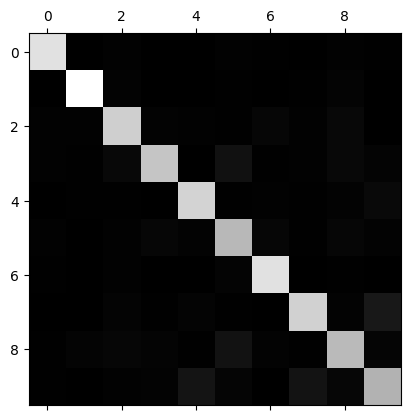

In [69]:
from matplotlib.pyplot import matshow

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()